In [122]:
from numpy import zeros, sqrt, linalg, loadtxt,array, ones, exp, eye, copy,sign,real,imag,transpose,log,average,sort, var, conj, math, var,append, save,argsort, delete
from numpy.linalg import inv
import matplotlib.pyplot as plt
from random import randint, random, gauss
from scipy.sparse import lil_matrix
from scipy.optimize import basinhopping, dual_annealing, shgo, direct, brute, differential_evolution, minimize
from scipy.sparse.linalg import eigsh
import time
import numpy as np

def loadData(N,rho,U,V):
    phi = loadtxt("Ns%i_N%i_J%f_U%f_V%f"%(round(N/rho),N,1,U,V))
    phi /= sqrt(sum(sum(abs(phi)**2)))
    return phi

N=4
Ns=20
phi = loadData(N,rho=N/Ns,U=40,V=0)

def getP(xs):
    out = 1
    for i in range(N):
        for j in range(i+1,N):
            out *= abs(phi[xs[i],xs[j]])**2
    return out

def getN(xs):
    out = zeros(Ns)
    for x in xs:
        out[x]+=1
    return out

def numOfAt(pos, xs):
    out = 0
    for x in xs:
        if x==pos:
            out +=1
    return out

def getG2(xs):
    out = zeros((Ns,Ns))
    for x in xs:
        for xp in xs:
            if x ==xp:
                out[x,xp]+=(numOfAt(x,xs)-1)*numOfAt(xp,xs)
            else:
                out[x,xp]+=numOfAt(x,xs)*numOfAt(xp,xs)
    return out

def randNewXs(xsOld):
    xsNew = xsOld.copy()
    for n in range(N):
        #jump = randint(-4, 4)
        jump = int(gauss(mu=0, sigma=2.1))
        xsNew[n] =xsNew[n]-jump
        if xsNew[n]>=Ns:
            xsNew[n]-=Ns
        elif xsNew[n]<0:
            xsNew[n]+=Ns
    return xsNew

In [123]:
Ns=20       
    
NisR = zeros(Ns)
G2sR = zeros([Ns,Ns])

for i1 in range(Ns):
    for i2 in range(Ns):
        for i3 in range(Ns):
            for i4 in range(Ns):
                NisR += getN([i1,i2,i3,i4])*getP([i1,i2,i3,i4])
                G2sR += getG2([i1,i2,i3,i4])*getP([i1,i2,i3,i4])
NisR /= sum(NisR)*N
G2sR /= sum(sum(G2sR))*N*(N-1)  

In [130]:
Nis = zeros(Ns)
G2s = zeros([Ns,Ns])
time0 = time.time()
xs = np.random.randint(0,Ns-1,N)

t=0
while t < 500000:
    Pold = getP(xs)
    xsNew = randNewXs(xs)
    Pnew = getP(xsNew)
  #  A = min(1,Pnew/Pold)
    if random() <= min(1,Pnew/Pold):
        xs = xsNew
    Nis += getN(xs)
    G2s += getG2(xs)
    t+=1
G2s /= sum(sum(G2s))*N*(N-1)    
Nis /= sum(Nis)*N
print("DONE in",round((time.time()-time0)*1000),"[ms]")

DONE in 13403 [ms]


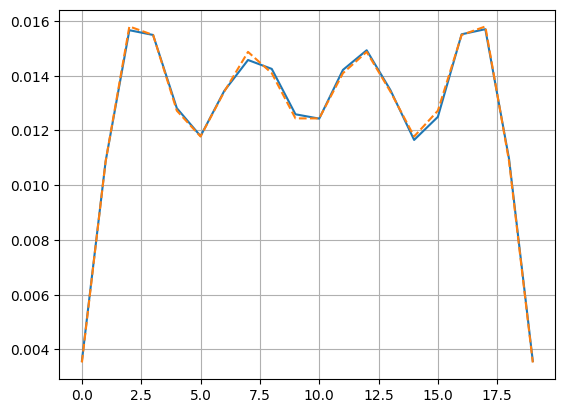

In [128]:
plt.plot(Nis)
plt.plot(NisR,'--')
plt.grid()
plt.show()

In [129]:
fig, ax = plt.subplots(1,3,figsize=[10,2.5])
pos = ax[0].imshow(G2s)
fig.colorbar(pos, ax=ax[0])
pos = ax[1].imshow(G2sR)
fig.colorbar(pos, ax=ax[1])
pos = ax[2].imshow(G2sR-G2s)
fig.colorbar(pos, ax=ax[2])

plt.tight_layout()
plt.show()

-6
